In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [82]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from tensorflow.keras import backend as K, callbacks
from sklearn.metrics import accuracy_score as accuracy, f1_score, mean_absolute_error as mae
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import tensorflow as tf

In [61]:
file_path = '/content/drive/My Drive/stock_price_cnn/'
dataset_NASDAQ = pd.read_csv(file_path + "Processed_NASDAQ.csv", parse_dates=['Date'])
dataset_NYSE = pd.read_csv(file_path + "Processed_NYSE.csv", parse_dates=['Date'])
dataset_SP = pd.read_csv(file_path + "Processed_SP.csv", parse_dates=['Date'])
dataset_DJI = pd.read_csv(file_path + "Processed_DJI.csv", parse_dates=['Date'])
dataset_RUSSELL = pd.read_csv(file_path + "Processed_RUSSELL.csv", parse_dates=['Date'])

In [62]:
dataset_NASDAQ.index = dataset_NASDAQ['Date']
dataset_NYSE.index = dataset_NYSE['Date']
dataset_SP.index = dataset_SP['Date']
dataset_DJI.index = dataset_DJI['Date']
dataset_RUSSELL.index = dataset_RUSSELL['Date']

In [63]:
dataset_NASDAQ.columns

Index(['Date', 'Close', 'Volume', 'mom', 'mom1', 'mom2', 'mom3', 'ROC_5',
       'ROC_10', 'ROC_15', 'ROC_20', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_200',
       'DTB4WK', 'DTB3', 'DTB6', 'DGS5', 'DGS10', 'Oil', 'Gold', 'DAAA',
       'DBAA', 'GBP', 'JPY', 'CAD', 'CNY', 'AAPL', 'AMZN', 'GE', 'JNJ', 'JPM',
       'MSFT', 'WFC', 'XOM', 'FCHI', 'FTSE', 'GDAXI', 'GSPC', 'HSI', 'DJI',
       'SSEC', 'RUT', 'NYSE', 'TE1', 'TE2', 'TE3', 'TE5', 'TE6', 'DE1', 'DE2',
       'DE4', 'DE5', 'DE6', 'CTB3M', 'CTB6M', 'CTB1Y', 'Name', 'AUD', 'Brent',
       'CAC-F', 'copper-F', 'WIT-oil', 'DAX-F', 'DJI-F', 'EUR', 'FTSE-F',
       'gold-F', 'HSI-F', 'KOSPI-F', 'NASDAQ-F', 'GAS-F', 'Nikkei-F', 'NZD',
       'silver-F', 'RUSSELL-F', 'S&P-F', 'CHF', 'Dollar index-F',
       'Dollar index', 'wheat-F', 'XAG', 'XAU'],
      dtype='object')

In [32]:
dataset_NASDAQ

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,2009-12-31,2269.149902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
2010-01-04,2010-01-04,2308.419922,0.560308,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2010-01-05,2010-01-05,2308.709961,0.225994,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
2010-01-06,2010-01-06,2301.090088,-0.048364,-0.003300,0.000126,0.017306,NaN,NaN,NaN,NaN,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
2010-01-07,2010-01-07,2300.050049,0.007416,-0.000452,-0.003300,0.000126,0.017306,NaN,NaN,NaN,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-09,2017-11-09,6750.049805,0.058830,-0.005755,0.003153,-0.002750,0.003252,0.522862,2.947790,2.194980,...,-0.24,-0.62,-0.34,-0.27,-0.61,-0.44,-0.45,0.53,-0.26,0.32
2017-11-10,2017-11-10,6750.939941,-0.116863,0.000132,-0.005755,0.003153,-0.002750,-0.199573,0.741356,1.838727,...,-0.27,-0.58,-0.20,-0.17,0.18,-0.07,-0.05,0.70,-0.71,-0.80
2017-11-13,2017-11-13,6757.600098,-0.000091,0.000987,0.000132,-0.005755,0.003153,-0.424963,0.875362,2.592598,...,-0.38,0.72,-0.04,0.10,0.06,0.12,0.11,-1.85,0.83,0.16


In [64]:
whole_data = dataset_NASDAQ.append(dataset_NYSE, ignore_index=True)

<ipython-input-64-d6196cdf7cee>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_data = dataset_NASDAQ.append(dataset_NYSE, ignore_index=True)


In [65]:
whole_data

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU,IXIC,S&P
0,2009-12-31,2269.149902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39,NaN,NaN
1,2010-01-04,2308.419922,0.560308,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,...,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10,NaN,NaN
2,2010-01-05,2308.709961,0.225994,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,...,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12,NaN,NaN
3,2010-01-06,2301.090088,-0.048364,-0.003300,0.000126,0.017306,NaN,NaN,NaN,NaN,...,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77,NaN,NaN
4,2010-01-07,2300.050049,0.007416,-0.000452,-0.003300,0.000126,0.017306,NaN,NaN,NaN,...,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,2017-11-09,12339.660156,-0.017375,-0.003638,0.001089,-0.002393,0.002252,-0.269134,-0.103377,-0.328426,...,-0.34,-0.27,-0.61,-0.44,-0.45,0.53,-0.26,0.32,-0.005755,-0.003762
3964,2017-11-10,12322.599609,-0.089962,-0.001383,-0.003638,0.001089,-0.002393,-0.407821,-0.354428,-0.868185,...,-0.20,-0.17,0.18,-0.07,-0.05,0.70,-0.71,-0.80,0.000132,-0.000898
3965,2017-11-13,12316.820313,-0.024084,-0.000469,-0.001383,-0.003638,0.001089,-0.678251,-0.021506,-0.545844,...,-0.04,0.10,0.06,0.12,0.11,-1.85,0.83,0.16,0.000987,0.000984
3966,2017-11-14,12280.110352,0.070184,-0.002980,-0.000469,-0.001383,-0.003638,-0.736705,-0.493472,-1.006691,...,-0.21,-0.15,-0.70,-0.71,-0.70,1.00,0.01,0.24,-0.002920,-0.002310


In [66]:
whole_data = whole_data.append(dataset_SP, ignore_index=True)
whole_data = whole_data.append(dataset_DJI, ignore_index=True)
whole_data = whole_data.append(dataset_RUSSELL, ignore_index=True)
whole_data

<ipython-input-66-7e2fee924d55>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_data = whole_data.append(dataset_SP, ignore_index=True)
<ipython-input-66-7e2fee924d55>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_data = whole_data.append(dataset_DJI, ignore_index=True)
<ipython-input-66-7e2fee924d55>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_data = whole_data.append(dataset_RUSSELL, ignore_index=True)


,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU,IXIC,S&P
0,2009-12-31,2269.149902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39,NaN,NaN
1,2010-01-04,2308.419922,0.560308,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,...,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10,NaN,NaN
2,2010-01-05,2308.709961,0.225994,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,...,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12,NaN,NaN
3,2010-01-06,2301.090088,-0.048364,-0.003300,0.000126,0.017306,NaN,NaN,NaN,NaN,...,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77,NaN,NaN
4,2010-01-07,2300.050049,0.007416,-0.000452,-0.003300,0.000126,0.017306,NaN,NaN,NaN,...,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,2017-11-09,1475.020020,-0.017375,-0.004528,0.001785,-0.012597,0.002040,-1.438644,-1.498534,-1.798888,...,-0.34,-0.27,-0.61,-0.44,-0.45,0.53,-0.26,0.32,-0.005755,-0.003762
9916,2017-11-10,1475.270020,-0.089962,0.000169,-0.004528,0.001785,-0.012597,-1.313792,-2.191175,-2.251448,...,-0.20,-0.17,0.18,-0.07,-0.05,0.70,-0.71,-0.80,0.000132,-0.000898
9917,2017-11-13,1475.069946,-0.024084,-0.000136,0.000169,-0.004528,0.001785,-1.528079,-1.061780,-1.497175,...,-0.04,0.10,0.06,0.12,0.11,-1.85,0.83,0.16,0.000987,0.000984
9918,2017-11-14,1471.260010,0.070184,-0.002583,-0.000136,0.000169,-0.004528,-0.529377,-2.081158,-1.943458,...,-0.21,-0.15,-0.70,-0.71,-0.70,1.00,0.01,0.24,-0.002920,-0.002310


In [67]:
whole_data["Close"]

0       2269.149902
1       2308.419922
2       2308.709961
3       2301.090088
4       2300.050049
           ...     
9915    1475.020020
9916    1475.270020
9917    1475.069946
9918    1471.260010
9919    1464.089966
Name: Close, Length: 9920, dtype: float64

In [68]:
print(len(dataset_NASDAQ ))
print(len(dataset_NYSE))
print(len(dataset_SP))
print(len(dataset_DJI ))
print(len(dataset_RUSSELL))

1984
1984
1984
1984
1984


In [69]:
whole_data.isnull().sum()

Date          0
Close         0
Volume        7
mom           5
mom1         10
           ... 
wheat-F      10
XAG           0
XAU           0
IXIC       1988
S&P        5954
Length: 86, dtype: int64

In [70]:
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 86 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            9920 non-null   datetime64[ns]
 1   Close           9920 non-null   float64       
 2   Volume          9913 non-null   float64       
 3   mom             9915 non-null   float64       
 4   mom1            9910 non-null   float64       
 5   mom2            9905 non-null   float64       
 6   mom3            9900 non-null   float64       
 7   ROC_5           9895 non-null   float64       
 8   ROC_10          9870 non-null   float64       
 9   ROC_15          9845 non-null   float64       
 10  ROC_20          9820 non-null   float64       
 11  EMA_10          9875 non-null   float64       
 12  EMA_20          9825 non-null   float64       
 13  EMA_50          9675 non-null   float64       
 14  EMA_200         8925 non-null   float64       
 15  DTB4

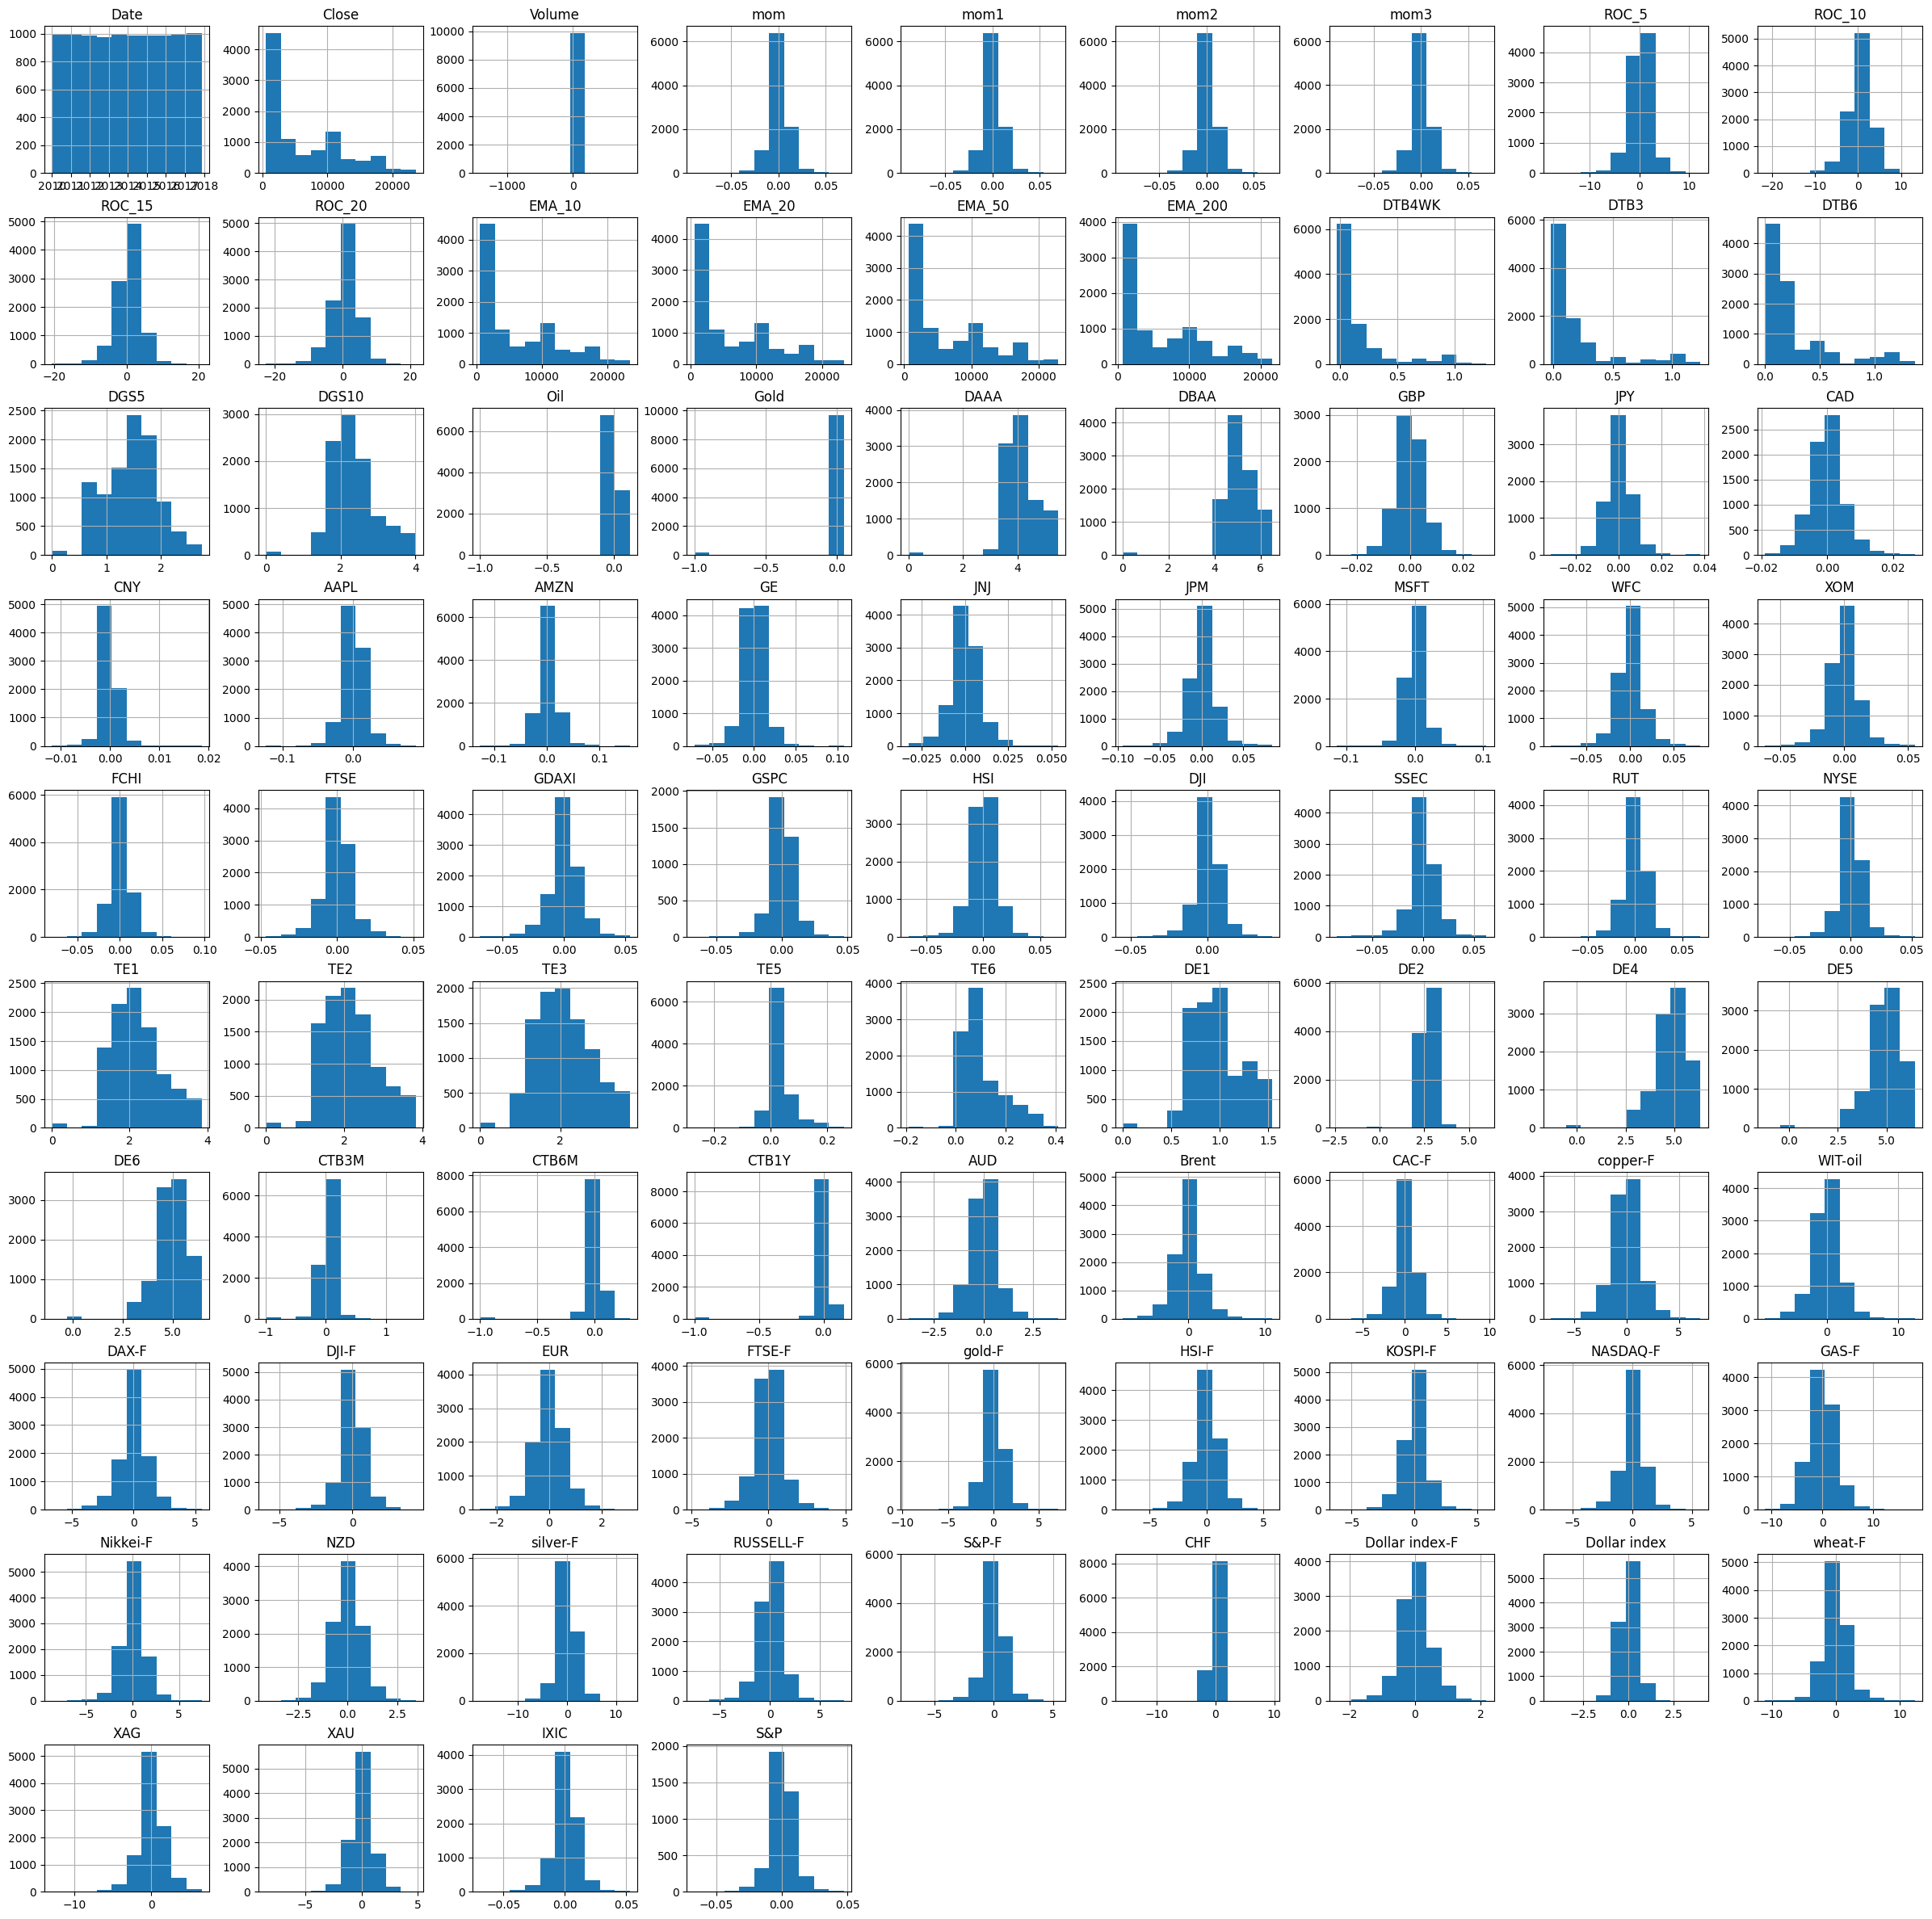

In [40]:
whole_data.hist(figsize=(30,30))
plt.show()

In [71]:
predict_index = 'DJI'
number_of_stocks = 0
order_stocks = []
predict_day = 1


def prepare_for_CNN():
    global number_of_stocks
    global samples_in_each_stock
    global number_feature
    global order_stocks
    tottal_train_data = np.empty((0,82))
    tottal_train_target = np.empty((0))
    tottal_test_data = np.empty((0,82))
    tottal_test_target = np.empty((0))

    for data in [dataset_DJI, dataset_NASDAQ, dataset_NYSE, dataset_RUSSELL, dataset_SP]:

        number_of_stocks += 1

        df_name = data['Name'][0]
        order_stocks.append(df_name)
        del data['Name']

        target = (data['Close'][predict_day:] / data['Close'][:-predict_day].values).astype(int)
        print(target)
        print("*****")
        data = data[:-predict_day]
        target.index = data.index
        data = data[200:]
        data = data.fillna(0)
        data['target'] = target
        target = data['target']
        del data['target']
        del data['Date']

        number_feature = data.shape[1]
        samples_in_each_stock = data.shape[0]

        train_data = data[data.index < '2016-04-21']
        train_data = scale(train_data)

        if df_name == predict_index:
            tottal_train_target = target[target.index < '2016-04-21']
            tottal_test_target = target[target.index >= '2016-04-21']

        data = pd.DataFrame(scale(data.values), columns=data.columns)
        data.index = target.index
        test_data = data[data.index >= '2016-04-21']

        tottal_train_data = np.concatenate((tottal_train_data, train_data))
        print(tottal_train_data.shape)
        tottal_test_data = np.concatenate((tottal_test_data, test_data))
        print(tottal_test_data.shape)

    train_size = int(tottal_train_data.shape[0]/number_of_stocks)
    print("Train size:", train_size)
    test_size = int(tottal_test_data.shape[0] / number_of_stocks)
    print("Test size:", test_size)

    tottal_train_data = tottal_train_data.reshape(number_of_stocks, train_size, number_feature)
    print("Total train data shape:", tottal_train_data.shape)
    tottal_test_data = tottal_test_data.reshape(number_of_stocks, test_size, number_feature)
    print("Total test data shape:", tottal_test_data.shape)

    return tottal_train_data, tottal_test_data, tottal_train_target, tottal_test_target

In [72]:
def cnn_data_sequence(data, target, seque_len):
    print ('sequencing data ...')
    new_train = []
    new_target = []

    for index in range(data.shape[1] - seque_len + 1):
        new_train.append(data[:, index: index + seque_len])
        new_target.append(target[index + seque_len - 1])

    new_train = np.array(new_train)
    new_target = np.array(new_target)

    return new_train, new_target

In [73]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision_pos = precision(y_true, y_pred)
    recall_pos = recall(y_true, y_pred)
    precision_neg = precision((K.ones_like(y_true)-y_true), (K.ones_like(y_pred)-K.clip(y_pred, 0, 1)))
    recall_neg = recall((K.ones_like(y_true)-y_true), (K.ones_like(y_pred)-K.clip(y_pred, 0, 1)))
    f_posit = 2*((precision_pos*recall_pos)/(precision_pos+recall_pos+K.epsilon()))
    f_neg = 2 * ((precision_neg * recall_neg) / (precision_neg + recall_neg + K.epsilon()))

    return (f_posit + f_neg) / 2

In [74]:
def sklearn_acc(model, test_data, test_target):
    overall_results = model.predict(test_data)
    test_pred = (overall_results > 0.5).astype(int)
    acc_results = [mae(overall_results, test_target), accuracy(test_pred, test_target),
                   f1_score(test_pred, test_target, average='macro')]

    return acc_results

In [75]:
number_filter = [8,8,8]

def CNN(train_data, test_data, train_target, test_target):
    seq_len = 60
    epoc = 100
    drop = 0.1
    cnn_train_data, cnn_train_target = cnn_data_sequence(train_data, train_target, seq_len)
    cnn_test_data, cnn_test_target = cnn_data_sequence(test_data, test_target, seq_len)
    result = []
    for i in range(1, 5):
        K.clear_session()
        print('i: ', i)
        print('fitting model')
        model = Sequential()
        model.add(Conv2D(number_filter[0], (1, 1), activation='relu', input_shape=(number_of_stocks, seq_len, number_feature), data_format='channels_last'))
        model.add(Dropout(0.1))
        model.add(BatchNormalization())
        model.add(Conv2D(number_filter[1], (number_of_stocks, 3), activation='relu'))
        model.add(MaxPool2D(pool_size=(1, 2)))
        model.add(Dropout(0.2))
        model.add(Conv2D(number_filter[2], (1, 3), activation='relu'))
        model.add(MaxPool2D(pool_size=(1, 2)))
        model.add(Flatten())
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='Adam', loss='mae', metrics=['acc', f1])
        model.fit(cnn_train_data, cnn_train_target, epochs=epoc, batch_size=128, verbose=0, validation_split=0.25)
        test_pred = sklearn_acc(model, cnn_test_data, cnn_test_target)
        print(test_pred)
        result.append(test_pred)
        model.summary()

    print('saving results')
    results = pd.DataFrame(result, columns=['MAE', 'Accuracy', 'F-score'])
    results = results.append([results.mean(), results.max(), results.std()], ignore_index=True)
    return results, model

In [76]:
train_data, test_data, train_target, test_target = prepare_for_CNN()
trained_model = CNN(train_data, test_data, train_target, test_target)

Date
2010-01-04    1
2010-01-05    0
2010-01-06    1
2010-01-07    1
2010-01-08    1
             ..
2017-11-09    0
2017-11-10    0
2017-11-13    1
2017-11-14    0
2017-11-15    0
Name: Close, Length: 1983, dtype: int64
*****
(1386, 82)
(397, 82)
Date
2010-01-04    1
2010-01-05    1
2010-01-06    0
2010-01-07    0
2010-01-08    1
             ..
2017-11-09    0
2017-11-10    1
2017-11-13    1
2017-11-14    0
2017-11-15    0
Name: Close, Length: 1983, dtype: int64
*****
(2772, 82)
(794, 82)
Date
2010-01-04    1
2010-01-05    1
2010-01-06    1
2010-01-07    1
2010-01-08    1
             ..
2017-11-09    0
2017-11-10    0
2017-11-13    0
2017-11-14    0
2017-11-15    0
Name: Close, Length: 1983, dtype: int64
*****
(4158, 82)
(1191, 82)
Date
2010-01-04    1
2010-01-05    0
2010-01-06    0
2010-01-07    1
2010-01-08    1
             ..
2017-11-09    0
2017-11-10    1
2017-11-13    0
2017-11-14    0
2017-11-15    0
Name: Close, Length: 1983, dtype: int64
*****
(5544, 82)
(1588, 82)
Date
2

<ipython-input-75-43a3159c3919>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append([results.mean(), results.max(), results.std()], ignore_index=True)


In [77]:
model_name = 'cnn_stock_model'
results, trained_model = CNN(train_data, test_data, train_target, test_target)
trained_model.save('/content/drive/My Drive/stock_price_cnn/model/' + model_name + '.h5')
print(f"Model saved as {model_name}.h5")

sequencing data ...
sequencing data ...
i:  1
fitting model
11/11 [==============================] - 0s 3ms/step
[0.4515705386826978, 0.5473372781065089, 0.3653400095725488]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 5, 60, 8)          664       
                                                                 
 dropout (Dropout)           (None, 5, 60, 8)          0         
                                                                 
 batch_normalization (Batch  (None, 5, 60, 8)          32        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 58, 8)          968       
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 29, 8)          0         
 D)           

<ipython-input-75-43a3159c3919>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append([results.mean(), results.max(), results.std()], ignore_index=True)
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as cnn_stock_model.h5


In [86]:
from tensorflow.keras.utils import get_custom_objects

def f1(y_true, y_pred):
    return 0.0

get_custom_objects().update({"f1": f1})

loaded_model = tf.keras.models.load_model('/content/drive/My Drive/stock_price_cnn/model/' + model_name + '.h5')

print(f"Model {model_name} loaded successfully")

Model cnn_stock_model loaded successfully


In [ ]:
import random

def select_random_row(data):
    random_index = random.randint(0, len(data) - 1)
    return data.iloc[random_index]

# Function to make predictions using the loaded model
def make_predictions(row):
    # Preprocess the selected row (using the same preprocessing logic as before)
    # Ensure the preprocessing logic matches the one used during training.
    preprocessed_data = row.values.reshape(1, 82, 5)

    # Make predictions using the loaded model
    prediction = loaded_model.predict(preprocessed_data)

    return prediction

In [96]:
selected_row = select_random_row(whole_data)

# Make predictions using the loaded model
prediction = make_predictions(selected_row)

# Print the prediction
print("Predicted value:", prediction)

ValueError: ignored